In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


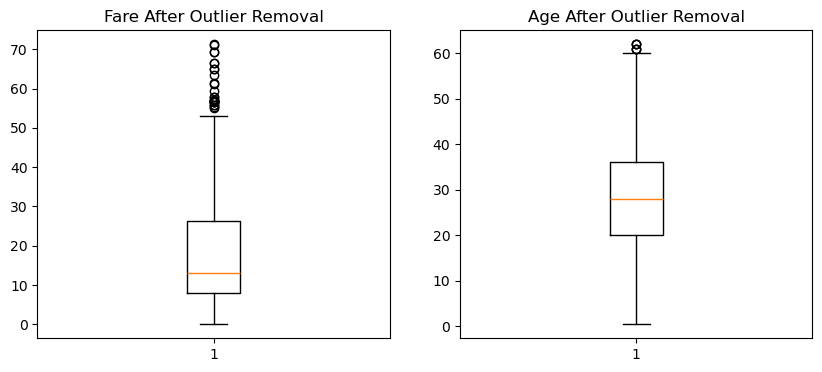

      Fare  Fare_scaled  Fare_normalized
0   7.2500    -0.819164         0.101707
1  71.2833     3.603889         1.000000
2   7.9250    -0.772539         0.111176
3  53.1000     2.347891         0.744915
4   8.0500    -0.763904         0.112930
    Age  Age_scaled  Age_normalized
0  22.0   -0.464025        0.350438
1  38.0    0.741355        0.610263
2  26.0   -0.162680        0.415395
3  35.0    0.515346        0.561546
4  35.0    0.515346        0.561546


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your dataset
df = pd.read_csv('titanic.csv')

# Drop missing values in relevant columns
df = df.dropna(subset=['Fare', 'Age'])

# --------- Outlier Removal Function ---------
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers from 'Fare' and 'Age'
df = remove_outliers_iqr(df, 'Fare')
df = remove_outliers_iqr(df, 'Age')

# --------- Box Plots After Removing Outliers ---------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Fare'])
plt.title('Fare After Outlier Removal')

plt.subplot(1, 2, 2)
plt.boxplot(df['Age'])
plt.title('Age After Outlier Removal')
plt.show()

# --------- Scaling (Standardization) ---------
scaler = StandardScaler()
df[['Fare_scaled', 'Age_scaled']] = scaler.fit_transform(df[['Fare', 'Age']])

# --------- Normalization (Min-Max) ---------
normalizer = MinMaxScaler()
df[['Fare_normalized', 'Age_normalized']] = normalizer.fit_transform(df[['Fare', 'Age']])

# Show the scaled and normalized data
print(df[['Fare', 'Fare_scaled', 'Fare_normalized']].head())
print(df[['Age', 'Age_scaled', 'Age_normalized']].head())


In [21]:
    data.shape

(601, 12)

In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,449.743760,0.357737,2.444260,28.152662,0.497504,0.407654,18.610960
std,263.175551,0.479733,0.726157,13.336564,0.962848,0.855497,13.669143
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,212.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,447.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,685.000000,1.000000,3.000000,36.000000,1.000000,1.000000,26.250000
max,891.000000,1.000000,3.000000,62.000000,5.000000,6.000000,65.000000


In [25]:
data.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,601,601,601,94,601
unique,601,2,484,72,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,402,7,4,496


In [27]:
data['Age'] = data['Age'].fillna(np.mean(data['Age']))

In [29]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [31]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [33]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: ylabel='count'>

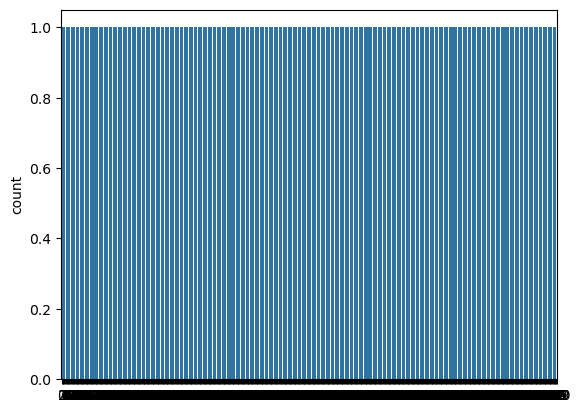

In [35]:
sns.countplot(data['Survived'])

<Axes: ylabel='count'>

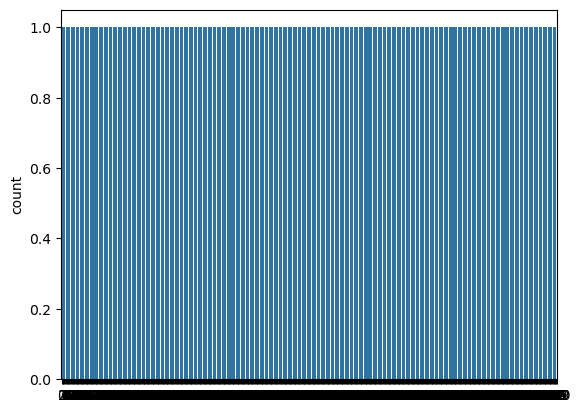

In [37]:
sns.countplot(data['Pclass'])

<Axes: xlabel='count', ylabel='Embarked'>

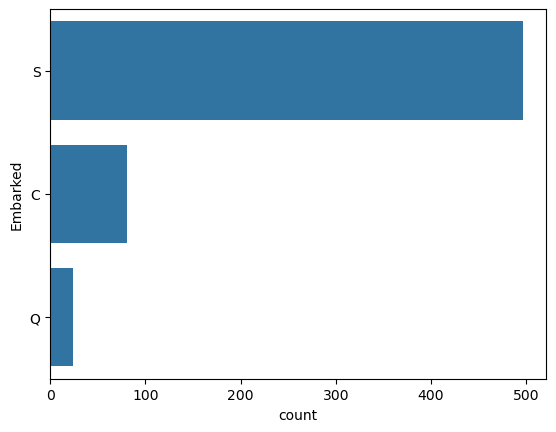

In [39]:
sns.countplot(data['Embarked'])

<Axes: xlabel='count', ylabel='Sex'>

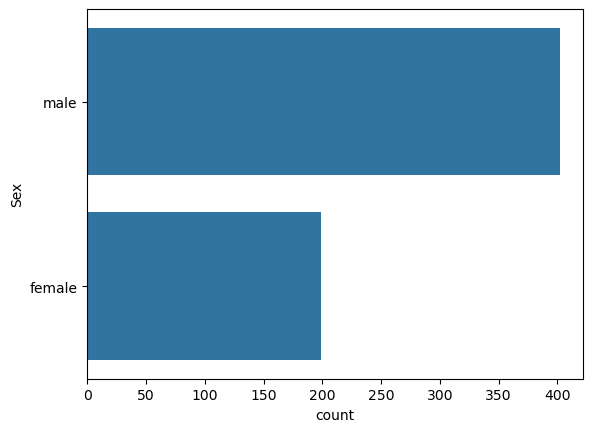

In [41]:
sns.countplot(data['Sex'])

<Axes: ylabel='Age'>

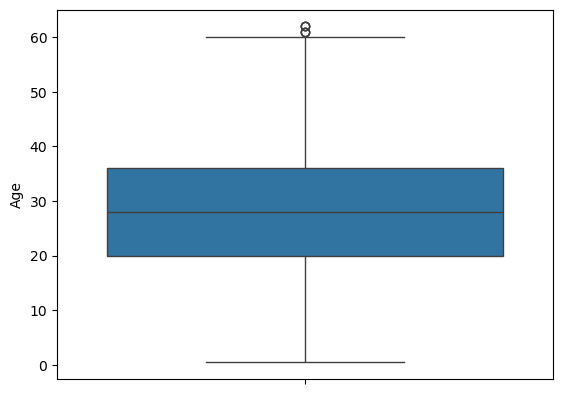

In [43]:
sns.boxplot(data['Age'])

<Axes: ylabel='Fare'>

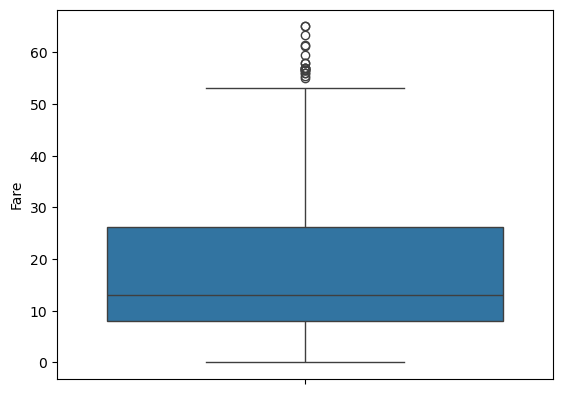

In [45]:
sns.boxplot(data['Fare'])

<Axes: ylabel='Pclass'>

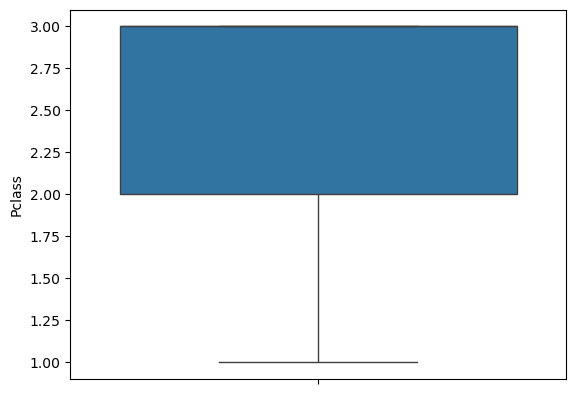

In [47]:
sns.boxplot(data['Pclass'])

<Axes: ylabel='SibSp'>

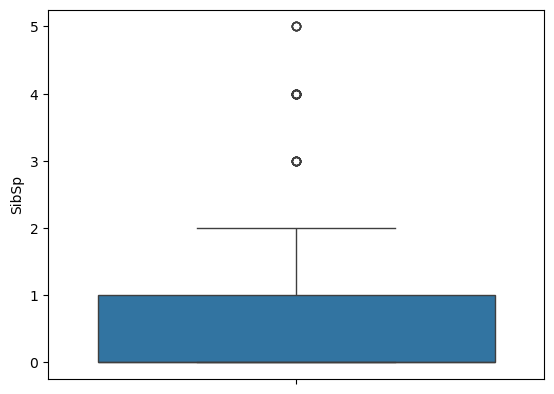

In [49]:
sns.boxplot(data['SibSp'])

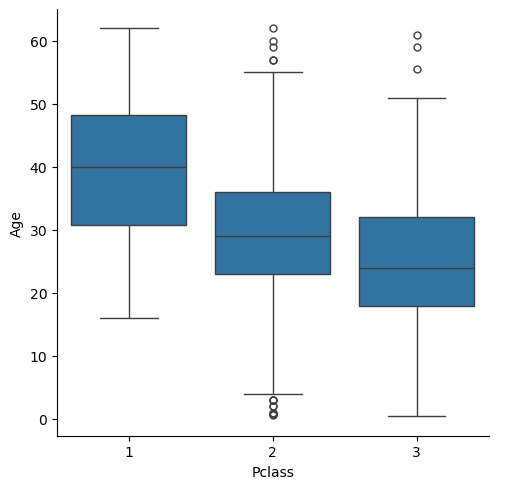

In [51]:
sns.catplot(x= 'Pclass', y = 'Age', data=data, kind = 'box')

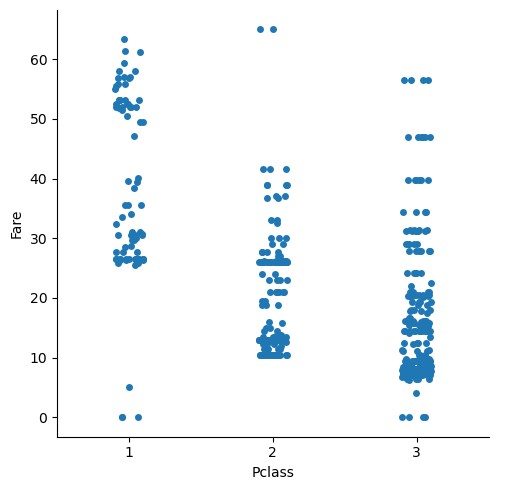

In [53]:
sns.catplot(x= 'Pclass', y = 'Fare', data=data, kind = 'strip')

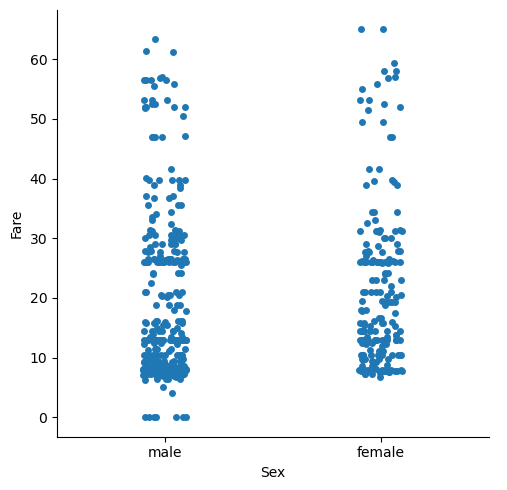

In [55]:
sns.catplot(x= 'Sex', y = 'Fare', data=data, kind = 'strip')

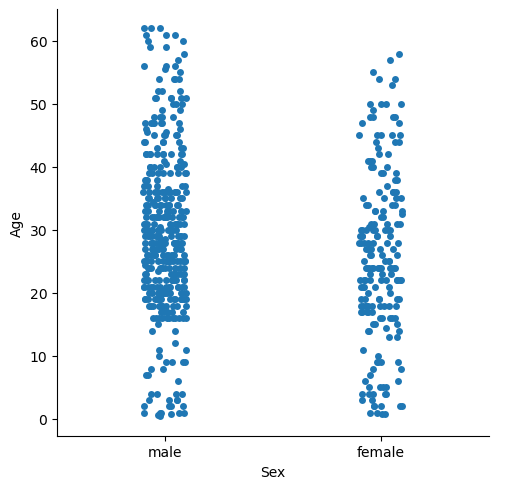

In [57]:
sns.catplot(x= 'Sex', y = 'Age', data=data, kind = 'strip')

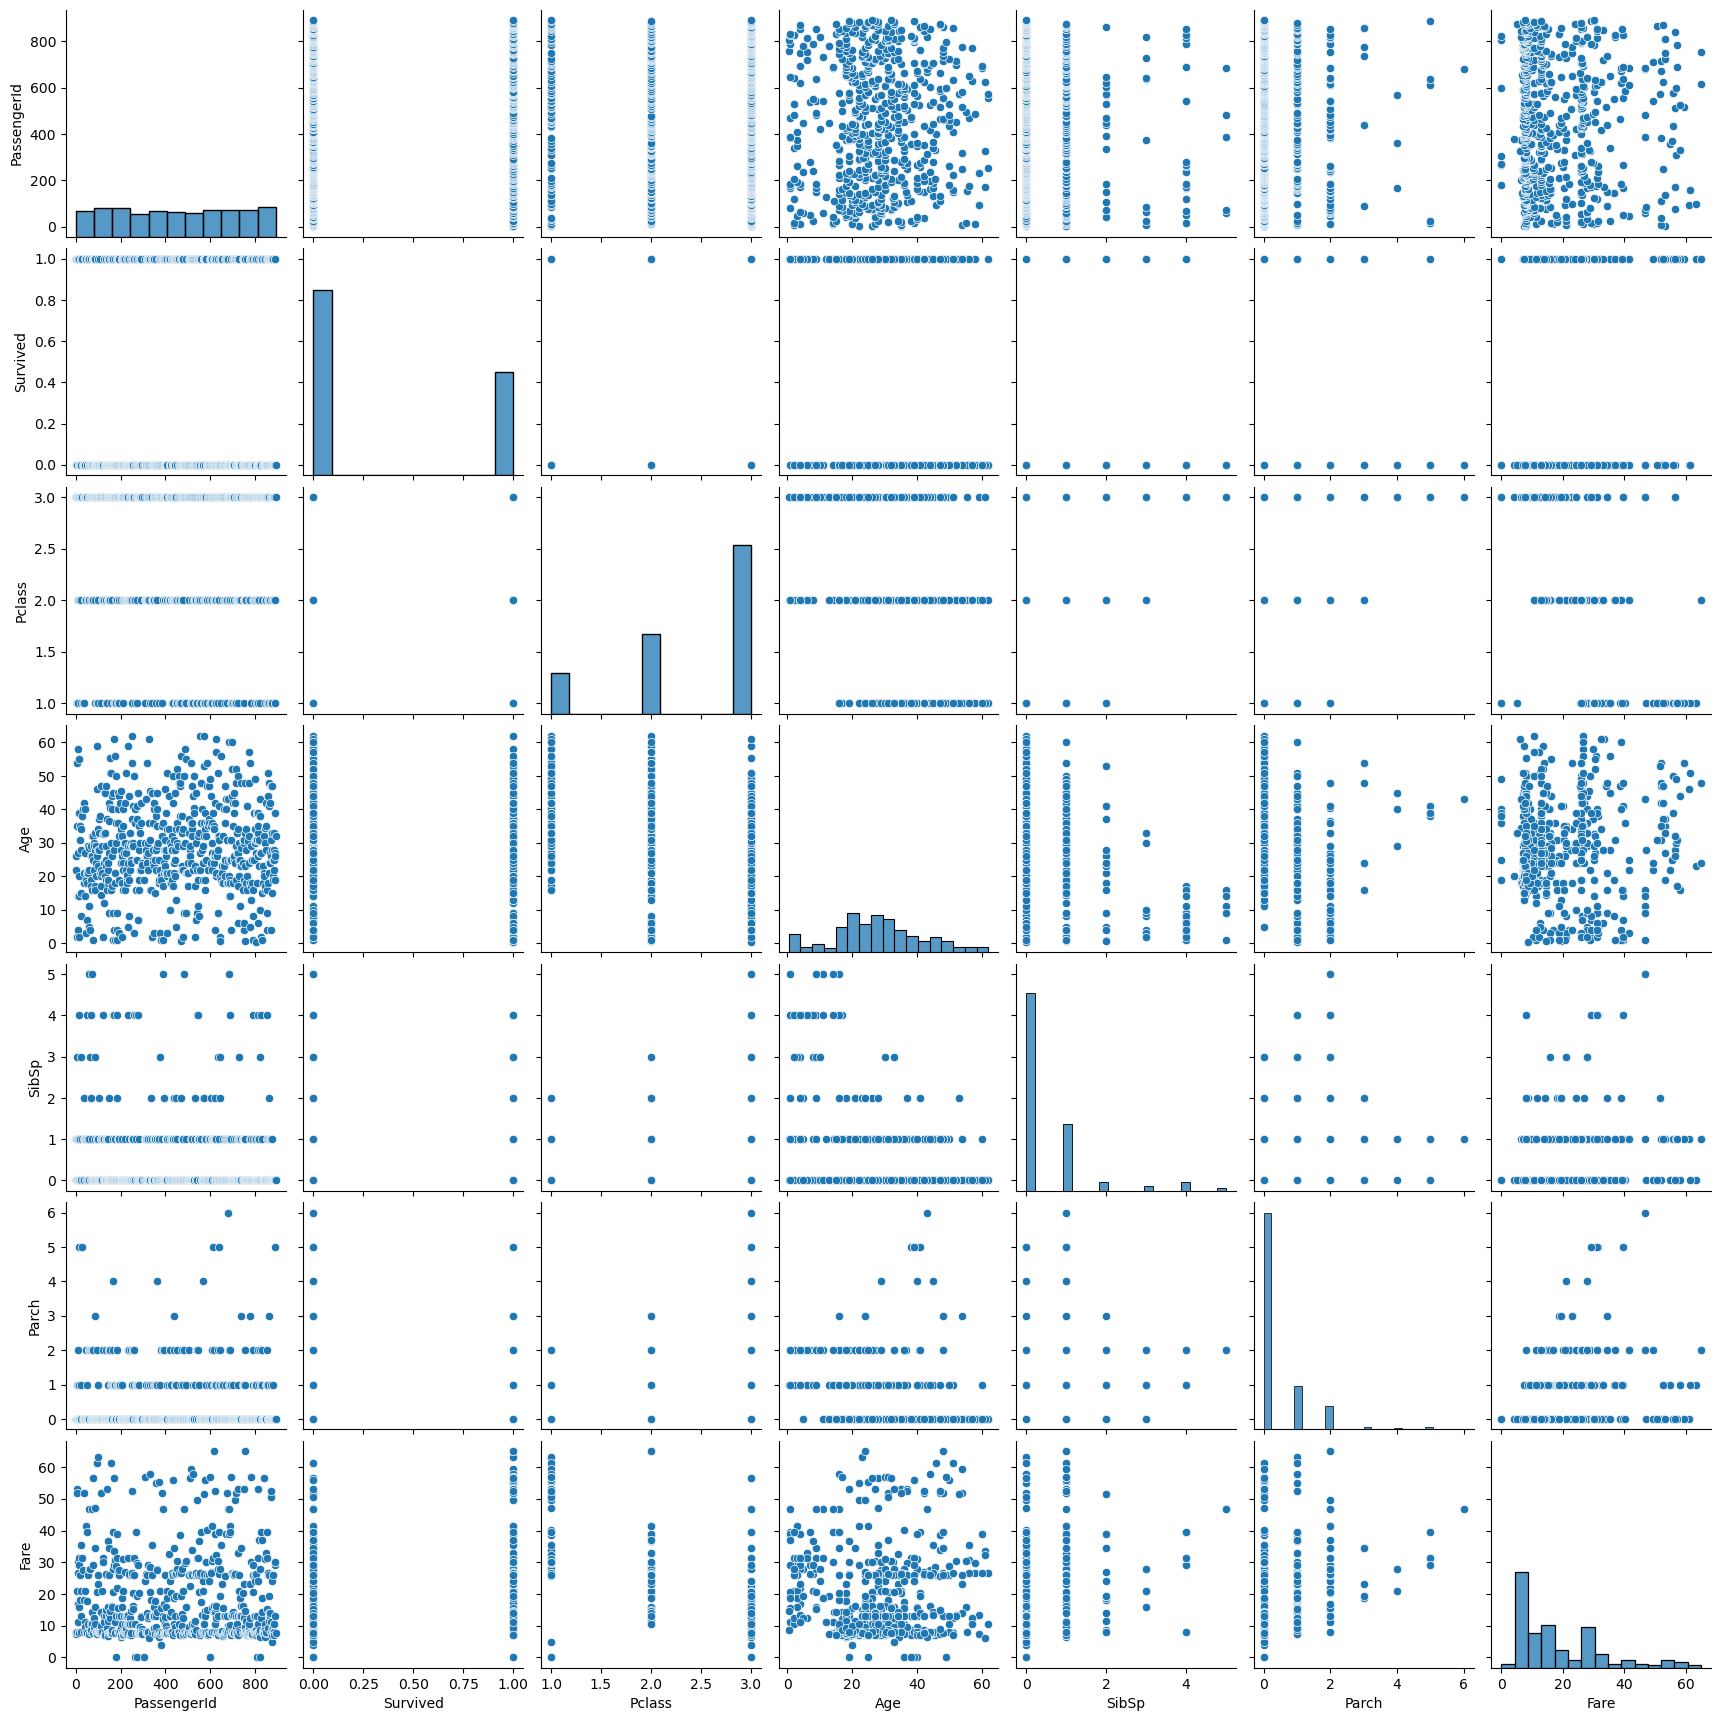

In [59]:
sns.pairplot(data)